<a href="https://colab.research.google.com/github/DrMelissaFranklin/DrMelissaFranklin/blob/main/Mel_Housing_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Harbinger
Project 2 aims to fit a univariate Housing Price Prediction model in a supervised manner using prior sales as labeled targets.  A linear regression choosing from mixed feature variables to find a model with the least error is the goal.

# Data Collection/Sources

A data dictionary file is available at AWS S3 at Housing Data Dictionary.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv

## Import the tools

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

## Collect the dataset

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv" #import from AWS collections
homes_df = pd.read_csv( url ) #convert cvs file to pandas dataframe
homes_df.head() #inspect the head
#81 columns indicates a large number of independent variables.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


# Characterize the Dataset


### How many rows and columns?

Confirm with 'shape' attribute.

---



In [ ]:
homes_df.shape

(2637, 81)

This is a large dataset with 81 columns and 2637 rows

In [ ]:
homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

## Mixed datatypes - obj, int, float
### Large file, at least 1.6+ mb (probably more since 'info' underreports)

###Low counts in Alley, Pool QC, Fence, Misc then Fireplace and Mas Vnr Type

In [ ]:
homes_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


### Counts, min, max, mean
###1 - SalePrice min of 12789, max of 7.45e+5 and mean of 1.79+5 (possible negative skew?)
###2 - massive std of 7.8+4 -- may be a problem for computing error from randomized train-test populations.
###3 - missing counts from Lot Frontage may be significant.

In [ ]:
categorical_cols = homes_df.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)
print(f"Number of categorical columns: {num_categorical_cols}")
homes_df.dtypes.value_counts()

Number of categorical columns: 43


,count
object,43
int64,27
float64,11


Of the 81 data columns about half, 43, are categorical.

In [ ]:
for col in categorical_cols:
    sub_categories = homes_df[col].nunique()
    print(f" Feature column named '{col}' has {sub_categories} sub-categories.")

 Feature column named 'MS Zoning' has 7 sub-categories.
 Feature column named 'Street' has 2 sub-categories.
 Feature column named 'Alley' has 2 sub-categories.
 Feature column named 'Lot Shape' has 4 sub-categories.
 Feature column named 'Land Contour' has 4 sub-categories.
 Feature column named 'Utilities' has 3 sub-categories.
 Feature column named 'Lot Config' has 5 sub-categories.
 Feature column named 'Land Slope' has 3 sub-categories.
 Feature column named 'Neighborhood' has 28 sub-categories.
 Feature column named 'Condition 1' has 9 sub-categories.
 Feature column named 'Condition 2' has 8 sub-categories.
 Feature column named 'Bldg Type' has 5 sub-categories.
 Feature column named 'House Style' has 8 sub-categories.
 Feature column named 'Roof Style' has 6 sub-categories.
 Feature column named 'Roof Matl' has 8 sub-categories.
 Feature column named 'Exterior 1st' has 16 sub-categories.
 Feature column named 'Exterior 2nd' has 17 sub-categories.
 Feature column named 'Mas Vnr 

##  Half numerical, half categorical columns
All categories have sub-categories, so the data is also quite complex.

### How many SubCategories within each Categorical column?

In [ ]:
# Get categorical columns to create a "list" of all the columns that are object datatype
categorical_list = homes_df.select_dtypes(include=['object']).columns

# Loop through each column in the categorical list and print the column name and the unique counts within it; (note: \n gives a new line in output for readability)
for subcat in categorical_list:
    print(f"\nValue counts for column '{col}':")

    # Get value counts for each category within the column
    value_counts_series = homes_df[col].value_counts()

    # Print the results from the value counts (WARNING: these will display as integers because value_counts operates )
    print(value_counts_series)


Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml     174
Family       44
Alloca       21
AdjLand      10
Name: count, dtype: int64

Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml     174
Family       44
Alloca       21
AdjLand      10
Name: count, dtype: int64

Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml     174
Family       44
Alloca       21
AdjLand      10
Name: count, dtype: int64

Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml     174
Family       44
Alloca       21
AdjLand      10
Name: count, dtype: int64

Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml     174
Family       44
Alloca       21
AdjLand      10
Name: count, dtype: int64

Value counts for column 'Sale Condition':
Sale Condition
Normal     2166
Partial     222
Abnorml   

## Is there missing data?

In [ ]:
homes_df.isnull().sum().sum()
#Yes, missing data

14208

### Percentage of nulls for all columns?

For all categorical and numerical data, how many nulls?

In [ ]:
# Find cat and num columns with nulls
cols_with_nulls = homes_df.columns[homes_df.isnull().any()].tolist()
num_cols_with_nulls = len(cols_with_nulls)

# Print the total count of columns with nulls
print(f"Here are {num_cols_with_nulls} columns with null values:")

# Create a dictionary to store null percentages
null_percentages = {}
for col in cols_with_nulls:
    null_percentage = (homes_df[col].isnull().sum() / len(homes_df)) * 100
    null_percentages[col] = null_percentage

# Sort the dictionary by values (null percentages) in descending order
# and reverse the order using reversed()
sorted_null_percentages = dict(reversed(sorted(null_percentages.items(), key=lambda item: item[1])))

# Print the results
for col, null_percentage in sorted_null_percentages.items():
    print(f"{null_percentage:.2f}% nulls in '{col}'")

Here are 26 columns with null values:
99.58% nulls in 'Pool QC'
96.36% nulls in 'Misc Feature'
93.17% nulls in 'Alley'
79.98% nulls in 'Fence'
60.94% nulls in 'Mas Vnr Type'
48.69% nulls in 'Fireplace Qu'
17.03% nulls in 'Lot Frontage'
5.57% nulls in 'Garage Cond'
5.57% nulls in 'Garage Qual'
5.57% nulls in 'Garage Finish'
5.57% nulls in 'Garage Yr Blt'
5.50% nulls in 'Garage Type'
2.88% nulls in 'Bsmt Exposure'
2.81% nulls in 'BsmtFin Type 2'
2.77% nulls in 'BsmtFin Type 1'
2.77% nulls in 'Bsmt Cond'
2.77% nulls in 'Bsmt Qual'
0.87% nulls in 'Mas Vnr Area'
0.08% nulls in 'Bsmt Half Bath'
0.08% nulls in 'Bsmt Full Bath'
0.04% nulls in 'Garage Area'
0.04% nulls in 'Garage Cars'
0.04% nulls in 'Total Bsmt SF'
0.04% nulls in 'Bsmt Unf SF'
0.04% nulls in 'BsmtFin SF 2'
0.04% nulls in 'BsmtFin SF 1'


# Data Cleaning

In [ ]:
df_clean = homes_df.copy()
df_clean.shape

(2637, 81)

## Drop categorical, keep numeric
### For now, focus on data already suited for regression, especially continuous (float) data.

In [ ]:
#DROP all categorical features
numerical_df = df_clean.drop(columns=categorical_cols, axis=1)

In [ ]:
numerical_df.shape
#38 columns left of numerical data only, int64 and float.

(2637, 38)

## Search for identifiers.

In the numerical columns, are there any unique identifiers that may be dropped?

In [ ]:
num_df = numerical_df.select_dtypes(include=[np.number])

# Calculate unique values for each numerical column
unique_counts = num_df.nunique()

print(unique_counts)
print("Shape of homes_df:", num_df.shape)

PID                2637
MS SubClass          16
Lot Frontage        126
Lot Area           1799
Overall Qual         10
Overall Cond          9
Year Built          118
Year Remod/Add       61
Mas Vnr Area        425
BsmtFin SF 1        935
BsmtFin SF 2        253
Bsmt Unf SF        1080
Total Bsmt SF      1001
1st Flr SF         1022
2nd Flr SF          589
Low Qual Fin SF      31
Gr Liv Area        1216
Bsmt Full Bath        4
Bsmt Half Bath        3
Full Bath             5
Half Bath             3
Bedroom AbvGr         7
Kitchen AbvGr         4
TotRms AbvGrd        12
Fireplaces            5
Garage Yr Blt       102
Garage Cars           6
Garage Area         576
Wood Deck SF        367
Open Porch SF       238
Enclosed Porch      175
3Ssn Porch           26
Screen Porch        115
Pool Area            12
Misc Val             35
Mo Sold              12
Yr Sold               5
SalePrice           983
dtype: int64
Shape of homes_df: (2637, 38)


### Drop identifiers

PID is not useful to our computations


In [ ]:
num_dfx = num_df.drop(columns=['PID'])

print(num_dfx.dtypes) #confirm datatypes

# Check for missing values
print(num_dfx.isnull().sum())


MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
SalePrice            int64
d

In [ ]:
num_dfx.shape #confirm column number is 37 not 38, since dropped PID from dataframe containing all numeric columns

(2637, 37)

## Drop null rows in all numeric columns

In [ ]:
#Find all null cells (by row) in the 37 numeric columns remaining
null_rows = num_dfx[num_dfx.isnull().any(axis=1)]

#Drop the nulls in the numerica dataframe
num_dfx.dropna(inplace=True)

#Check to see if there are any nulls
print(f"Nulls remaining are: {num_dfx.isnull().sum()}")

num_dfx.shape

Nulls remaining are: MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64


(2033, 37)

## How many numerical columns of each datatype?

### Be sure the new categorical-free dataframe has only numerical datatype, int64 / float.


In [ ]:
# Verify that the numerical dataframe has only integer and float data

only_num_df = num_dfx.select_dtypes(include=['int64', 'float']) #new data frame verifying it only contains numeric data

# Separate integer and float columns
int_df = only_num_df.select_dtypes(include=['int64']).columns # apply select_dtypes to num_df(dataframe)
float_df = only_num_df.select_dtypes(include=['float']).columns # apply select_dtypes to num_df(dataframe)

# Count and print results
print("Integer Columns:")
print(int_df.tolist())  # Convert Index to list for better printing
print(f"Total Integer Columns: {len(int_df)}\n") # Changed int_cols to int_df

print("Float Columns:")
print(float_df.tolist())  # Convert Index to list for better printing
print(f"Total Float Columns: {len(float_df)}\n") # Changed float_cols to float_df

print(f"Total Numerical Columns: {len(only_num_df.columns)}") #print total to confirm still have 38 numerical columns here

Integer Columns:
['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Total Integer Columns: 26

Float Columns:
['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
Total Float Columns: 11

Total Numerical Columns: 37


In [ ]:
only_num_df = only_num_df.copy()

print(only_num_df.dtypes)
print(only_num_df.isnull().sum())

#Only int64 and float data, no nulls.

MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
SalePrice            int64
d

In [ ]:
only_num_df.shape

(2033, 37)

# Exploratory Data Analysis


Correlation Matrix for both int and float features by SalePrice

<Axes: >

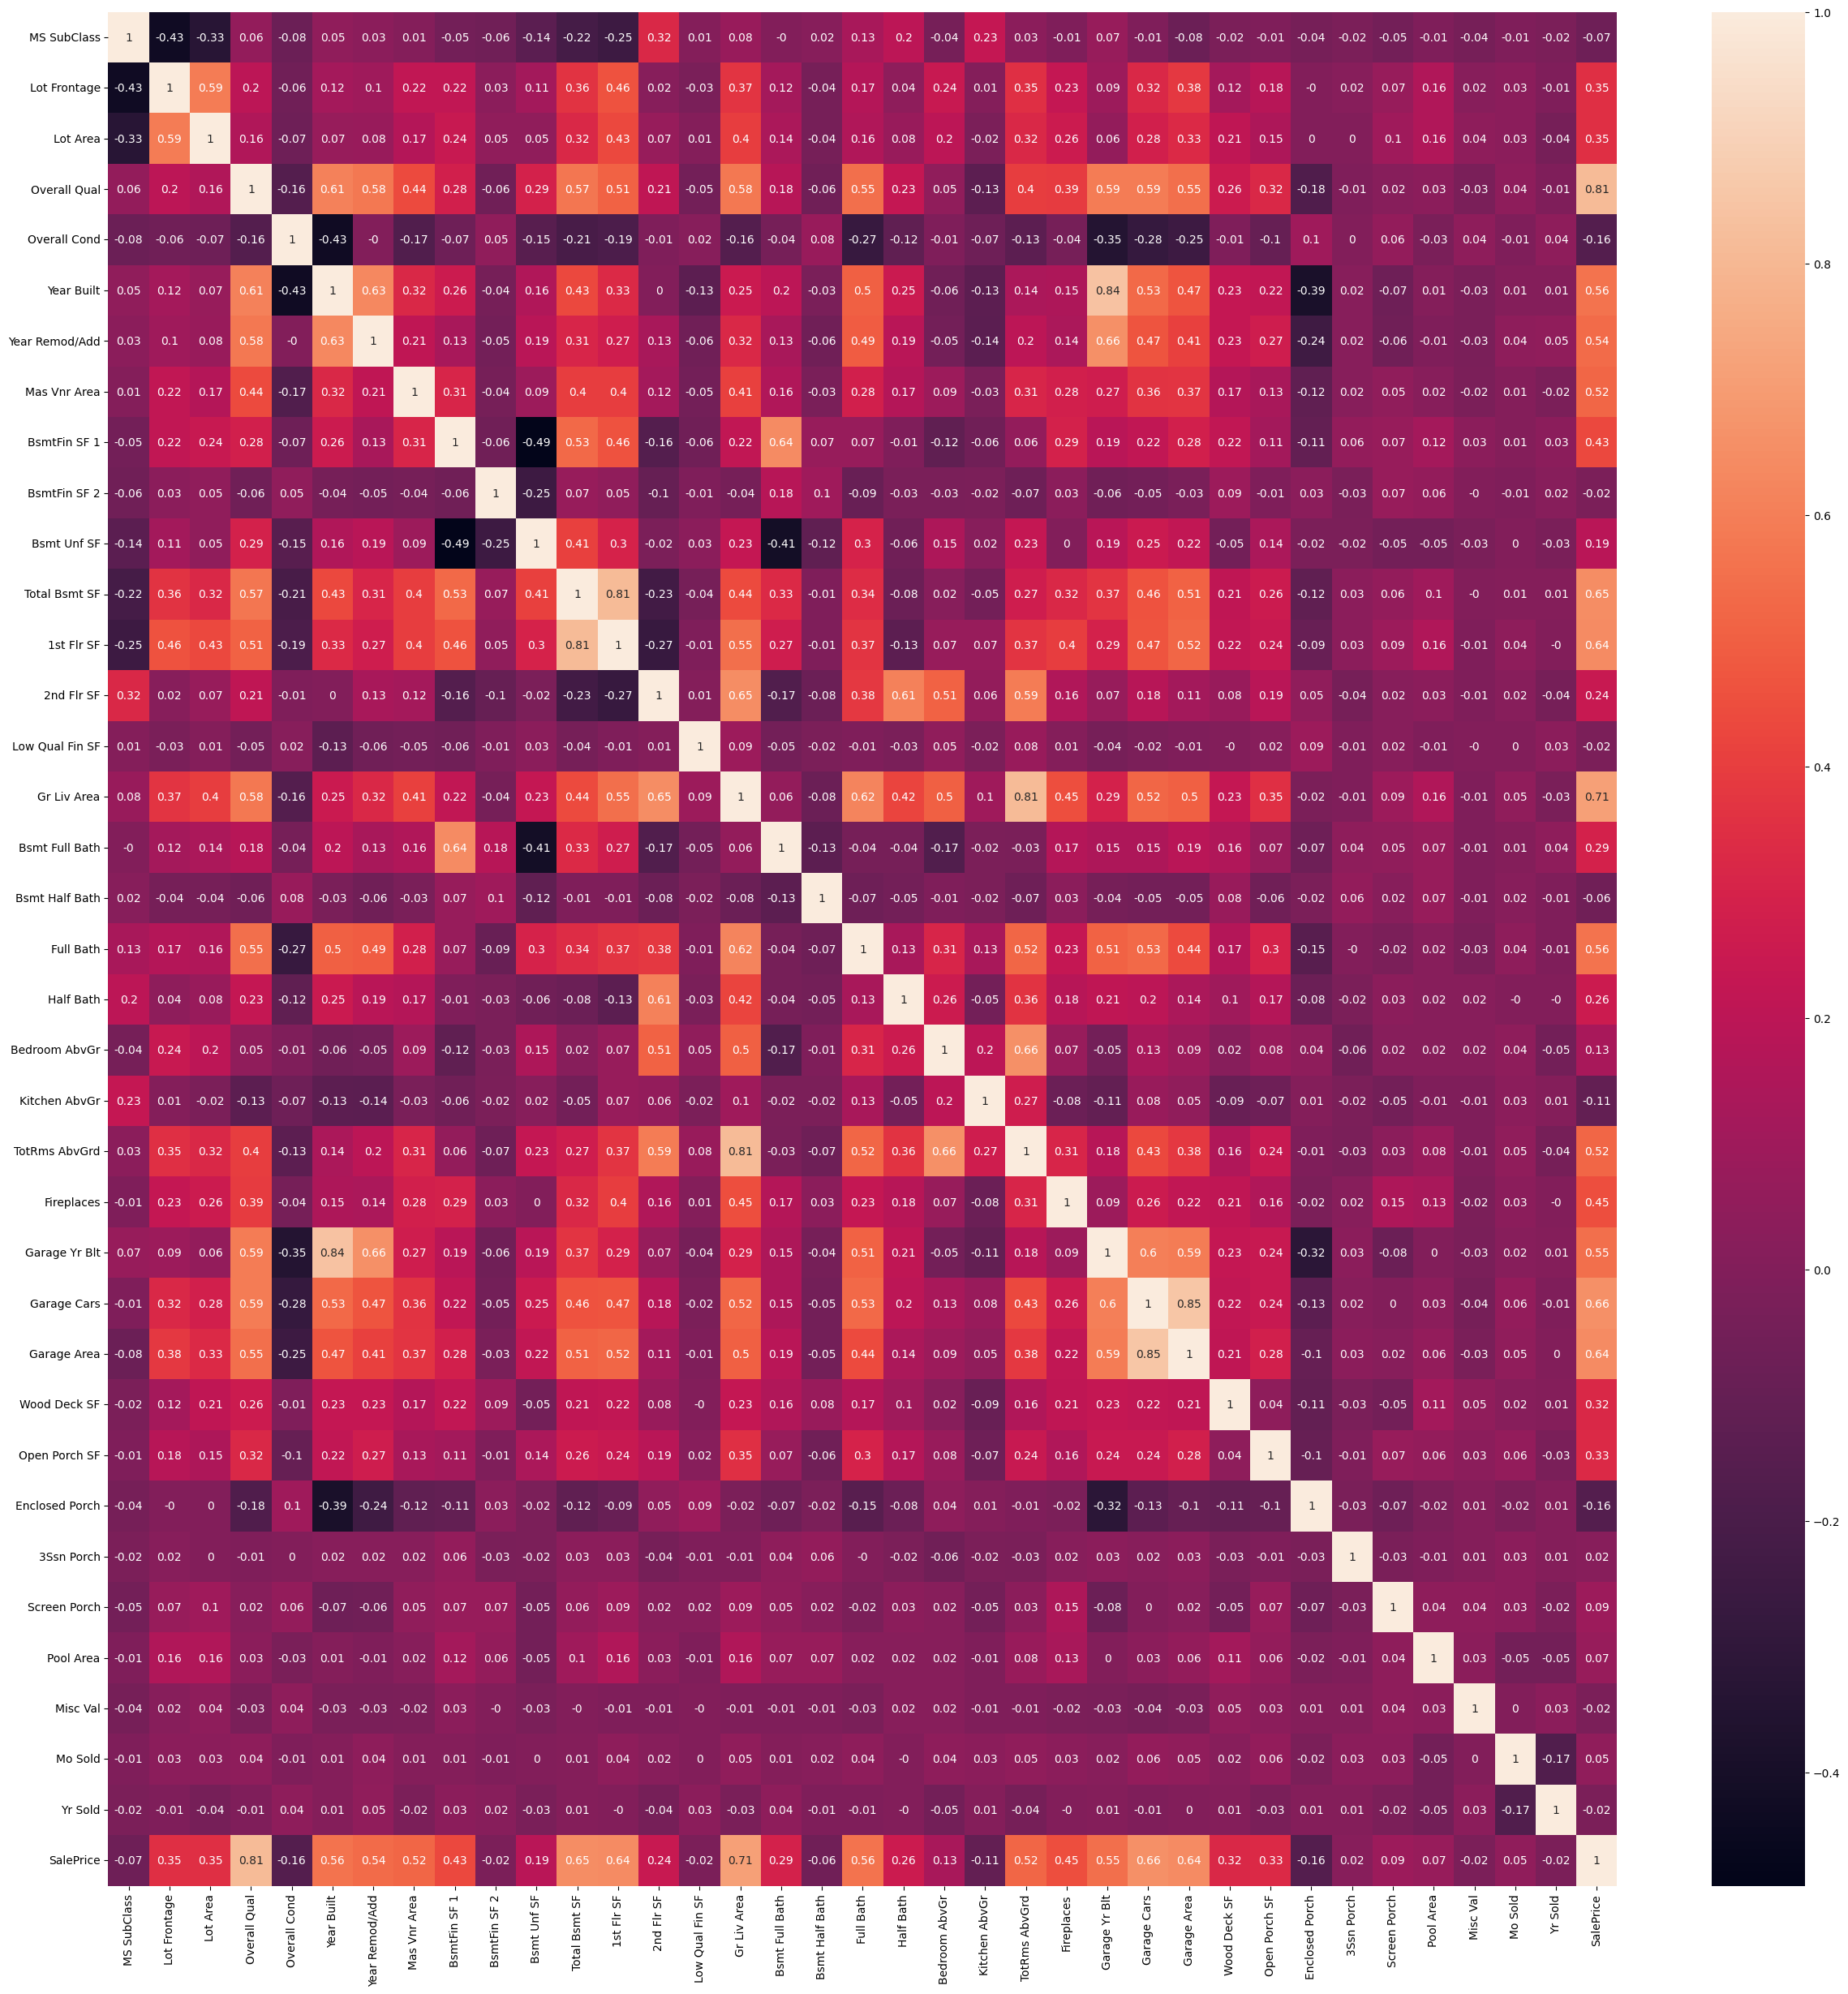

In [ ]:
# correlation plot of numerical features only
plt.figure(figsize = (30,30))
correlation_matrix = only_num_df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

#Results show some strong correlates, but the matrix is too busy to pick them out by eye in a systematic manner

## Separate out float data
### This narrows the scope of the correlate with SalePrice, and better match continuous data to the eventual linear regression.

In [ ]:
#first check only_num_df
only_num_df.shape

(2033, 37)

In [ ]:
#first check only_num_df
only_num_df.dtypes

,0
MS SubClass,int64
Lot Frontage,float64
Lot Area,int64
Overall Qual,int64
Overall Cond,int64
Year Built,int64
Year Remod/Add,int64
Mas Vnr Area,float64
BsmtFin SF 1,float64
BsmtFin SF 2,float64


In [ ]:
only_num_df.dtypes.value_counts()

,count
int64,26
float64,11


In [ ]:
only_num_df = numerical_df.select_dtypes(include=['int64', 'float']) # new data frame to verify there is only numeric data

# Get float columns plus 'SalePrice' since it's int64 and won't be drawn
float_cols = ['SalePrice'] + only_num_df.select_dtypes(include=['float']).columns.tolist()  # Add SalePrice to the list of float columns

# Select the float columns from the numerical dataframe to make a new dataframe
float_df = only_num_df[float_cols]

# Calculate the correlation and sort
corr_float = float_df.corr()['SalePrice'].abs().sort_values(ascending = False)

corr_float #strength of float column correlations to SalePrice

,SalePrice
SalePrice,1.000000
Garage Cars,0.647223
Garage Area,0.633900
Total Bsmt SF,0.628669
Garage Yr Blt,0.529771
Mas Vnr Area,0.506402
BsmtFin SF 1,0.427809
Lot Frontage,0.357142
Bsmt Full Bath,0.277328
Bsmt Unf SF,0.174628


## Correlational Matrix of numerical floats with SalePrice.


###Float column correlates of Sale Price with strength of correlation at .3 or greater:

Consider dropping numeric columns not necessary or strongly correlated to SalePrice

In [ ]:
print(num_dfx.dtypes)

# Check for missing values
print(num_dfx.isnull().sum())


MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
SalePrice            int64
d

Copy the inspect the float-only dataframe with SalePrice (int64) added.

Histograms for Numeric Independent Variables

## Histograms of numerical features
### Some have non-normal & binary distributions.
### Binary features behave as nominal.  


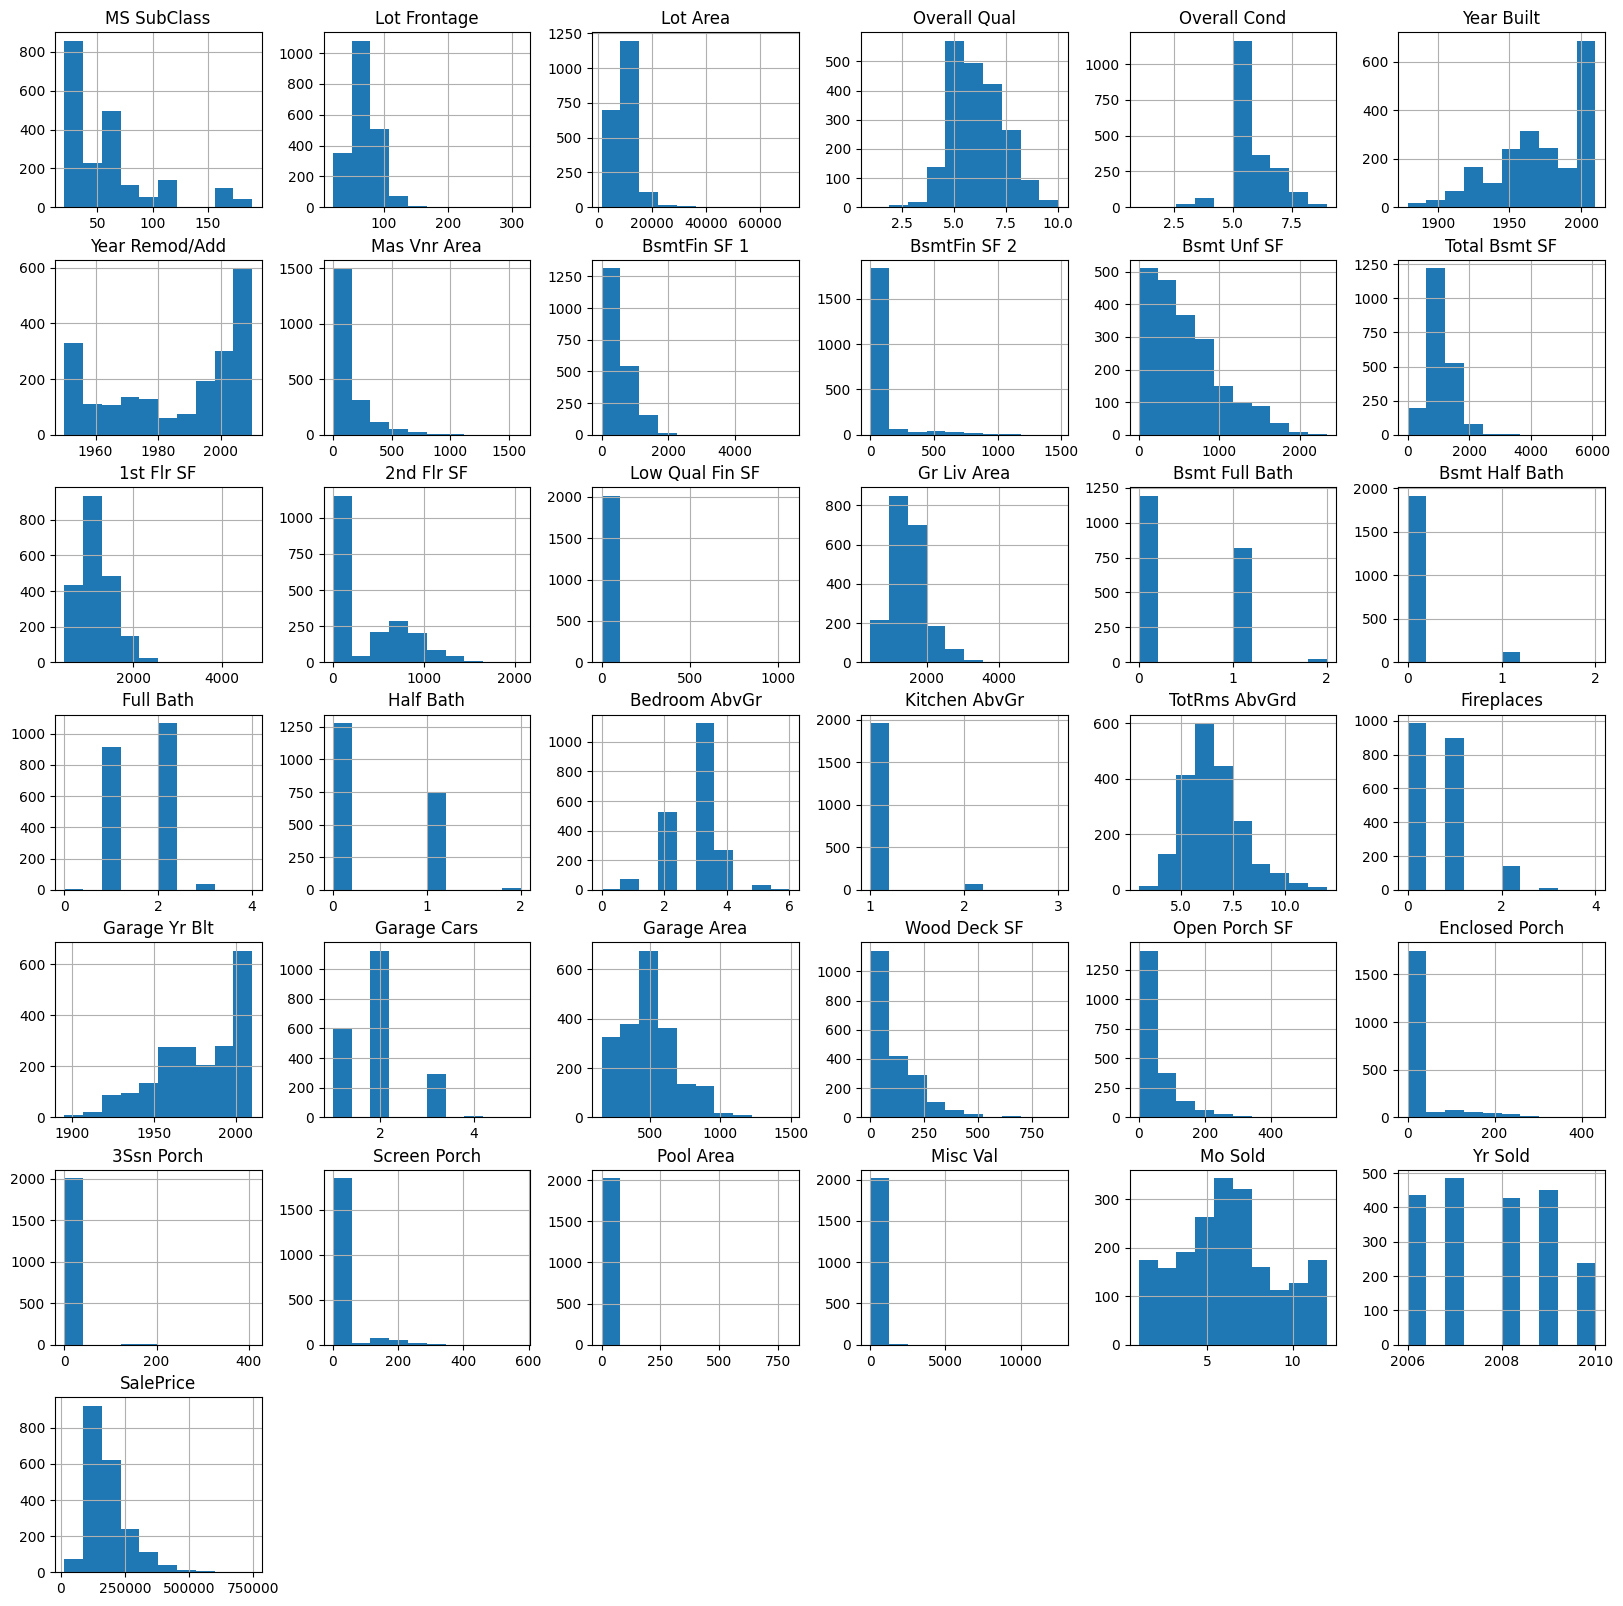

In [ ]:
# Find all columns with numbers and print their histograms
# Assuming you have a DataFrame named 'df'
numerical_features = num_dfx.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(20, 20))  # Adjust figsize for larger plots
plt.show()


## Strong correlates of 'Sales Price' mapped

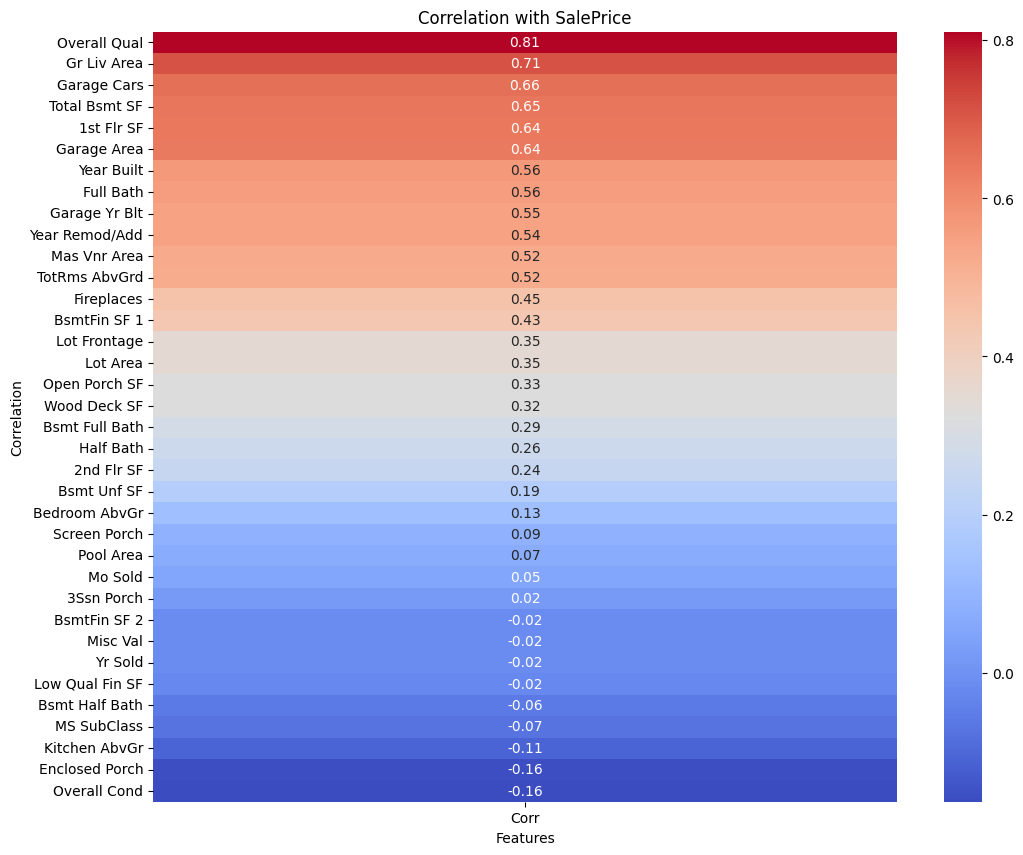

In [ ]:
# Correlation strength for numerical data
y = num_dfx['SalePrice']
# select all columns from numerical_features EXCEPT 'SalePrice'
X = numerical_features[[col for col in numerical_features.columns if col != 'SalePrice']]
Corr_matrix = X.corrwith(y).to_frame(name='Corr')

#Sort the Corr_matrix in place.
Corr_matrix.sort_values(by='Corr', ascending=False, inplace=True)

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap using the sorted Corr_matrix
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()

### There are several strong correlates greater than .2-.3 in the table of numerical features that are likely to be good predictors of Sales Price.

### Histogram of strength of correlates from the numerical features:

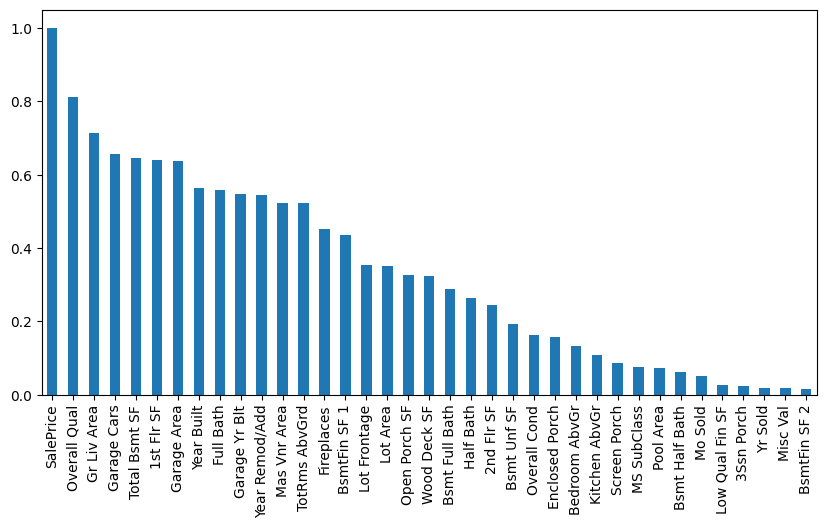

In [ ]:
num_dfx.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

In [ ]:
#What are the strongest predictors of Sales Price? Correlations greater than .3

corr_num_Sales = numerical_features.corr()['SalePrice'].abs().sort_values(ascending = False)
pred = corr_num_Sales[(corr_num_Sales>.3) & (corr_num_Sales <1)]
pred


,SalePrice
Overall Qual,0.810953
Gr Liv Area,0.713131
Garage Cars,0.657323
Total Bsmt SF,0.646068
1st Flr SF,0.640274
Garage Area,0.637670
Year Built,0.564329
Full Bath,0.558774
Garage Yr Blt,0.547303
Year Remod/Add,0.544543


In [ ]:
# making sure there are no nulls left
num_dfx.isnull().sum().sum()

0

##Scatter plots of numerical distributions


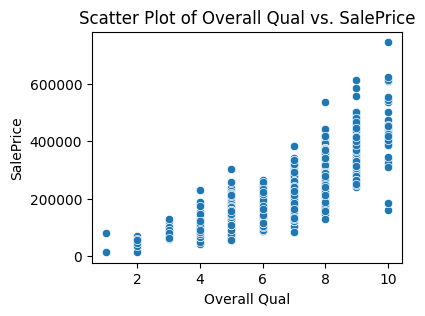

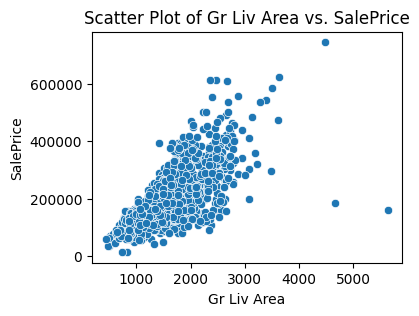

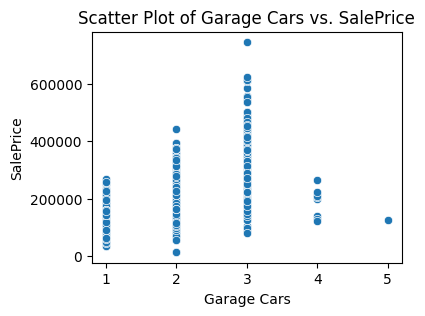

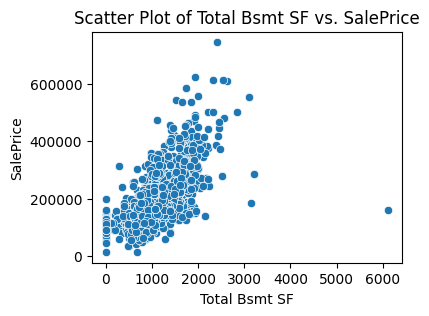

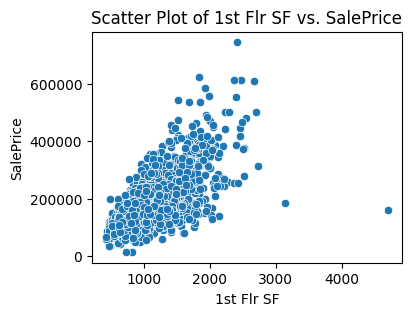

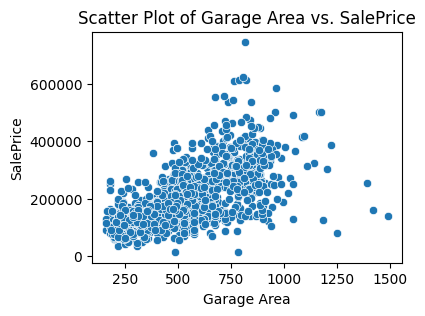

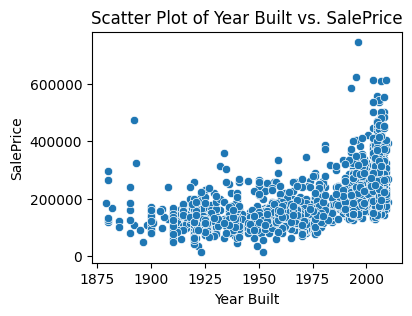

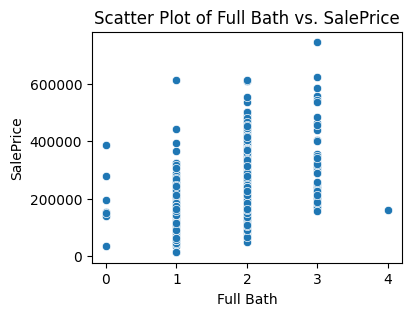

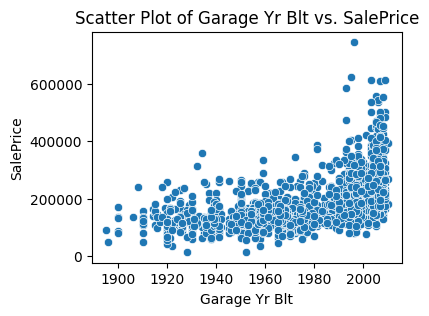

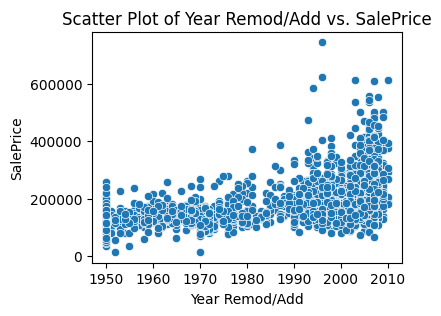

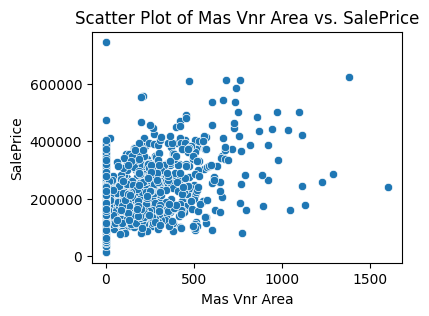

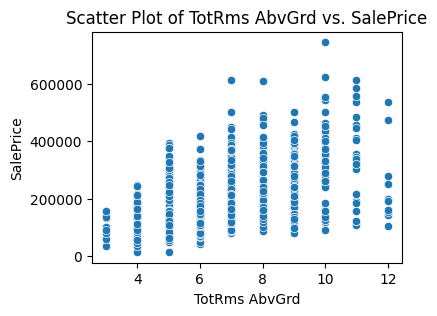

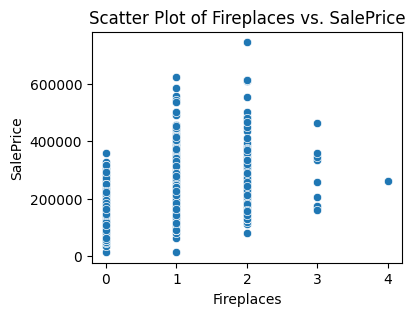

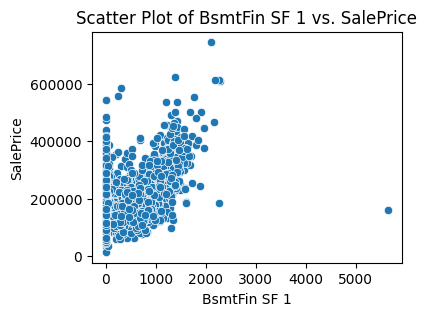

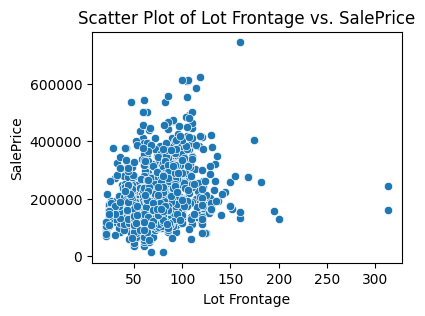

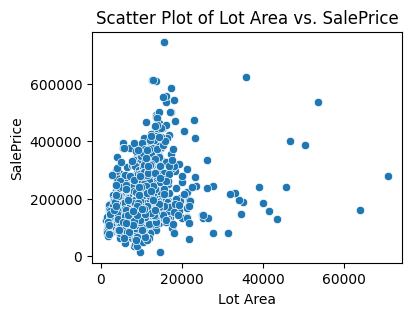

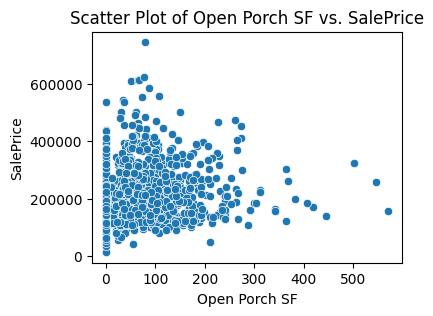

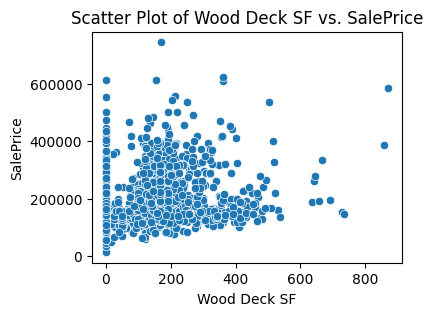

In [ ]:
for num_feature in pred.index:  # Iterate through the features in 'pred'
    plt.figure(figsize=(4,3))  # Adjust figure size if needed
    sns.scatterplot(x= num_feature, y='SalePrice', data=num_dfx)
    plt.title(f'Scatter Plot of {num_feature} vs. SalePrice')
    plt.xlabel(num_feature)
    plt.ylabel('SalePrice')
    plt.show()

### Some distributions are non-linear, and may not be appropriate for linear regression.
Note: this data is not scaled.

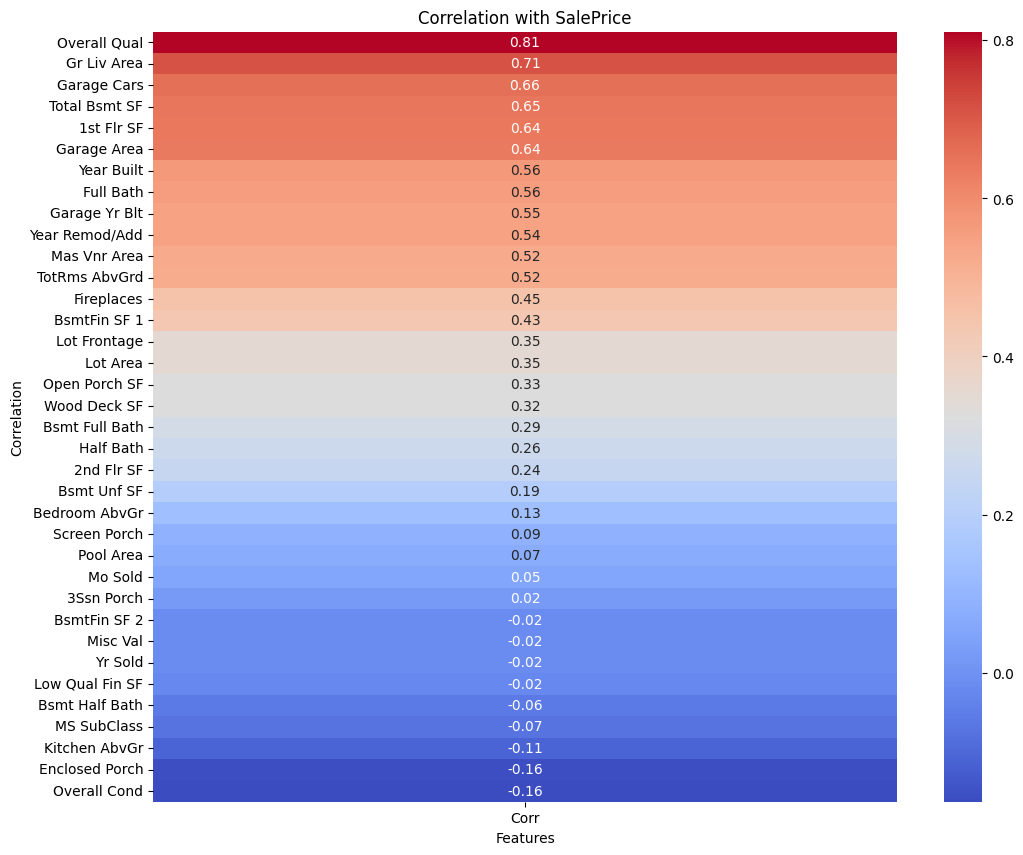

In [ ]:
# Correlation Matrix heat map to show all strongest to weakest correlates with 'Sales Price'
Corr_matrix_sorted = Corr_matrix.sort_values(by='Corr', ascending=False)

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(Corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()

## Drop numerical correlates of SalePrice < .3

count      2033.000000
mean     183745.530251
std       81566.772763
min       12789.000000
25%      130000.000000
50%      160000.000000
75%      215000.000000
max      745000.000000
Name: SalePrice, dtype: float64


<ipython-input-34-6a6d59b7eedd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_dfx['SalePrice'])


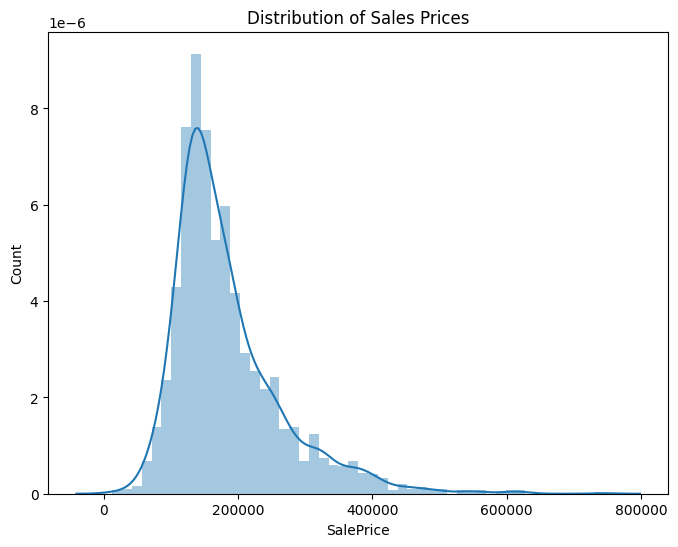

In [ ]:
#Describe basic stats for Sales Price
print(num_dfx['SalePrice'].describe())

#Plot Sales Price as a histogram
plt.figure(figsize = (8,6))
sns.distplot(num_dfx['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of Sales Prices')
plt.show()

# Linear Regression MVP Model #1 - with numeric [independent?] variables correlated > .3, without any categorical features


Copy reduced dataframe, after dropping nulls, identifiers, and weak correlates of SalePrice

In [ ]:
num_dfx_mod1 = num_dfx.copy()
num_dfx_mod1.shape

(2033, 37)

In [ ]:
num_dfx_mod1.dtypes

,0
MS SubClass,int64
Lot Frontage,float64
Lot Area,int64
Overall Qual,int64
Overall Cond,int64
Year Built,int64
Year Remod/Add,int64
Mas Vnr Area,float64
BsmtFin SF 1,float64
BsmtFin SF 2,float64


In [ ]:
num_dfx.isnull().sum()

,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0
BsmtFin SF 1,0
BsmtFin SF 2,0


## Separate the training set from the test set (numeric feature, target: Sales Price).  
### Training set is the numerical correlates, [continuous? data]

In [ ]:
# Break up the data into training and testing sets
X = num_dfx.drop('SalePrice', axis = 1) # assign target to X
y = num_dfx['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
model = LinearRegression()
floats_fitted = model.fit(X_train, y_train)

(floats_fitted.intercept_, floats_fitted.coef_ )

(1095327.3624642706,
 array([-1.76681257e+02, -1.07533760e+02,  6.85903662e-01,  1.95231143e+04,
         4.73473627e+03,  3.17359312e+02,  1.69876962e+02,  3.42761727e+01,
         1.23607687e+01, -2.43512856e-01, -1.79381458e+00,  1.03234412e+01,
         1.95898697e+01,  1.64358388e+01,  4.08397002e+00,  4.01096785e+01,
         8.28197835e+03,  1.26610952e+03,  1.01895397e+03,  4.44697581e+02,
        -7.93689529e+03, -1.91901928e+04,  2.58491432e+03,  1.70992221e+03,
        -1.95582360e+01,  1.06111473e+04,  1.29041110e+01,  1.85497949e+01,
        -1.01984973e+01,  1.49730102e+01,  2.94639454e+01,  3.96121992e+01,
        -6.30474744e+01, -4.15841411e-01,  3.69422717e+02, -1.04147523e+03]))

In [ ]:
print(X_train.dtypes)

MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
dtype: object


## Data Visualization/Communication of Results


## Plot linear regression model #1, MVP
##   Residuals

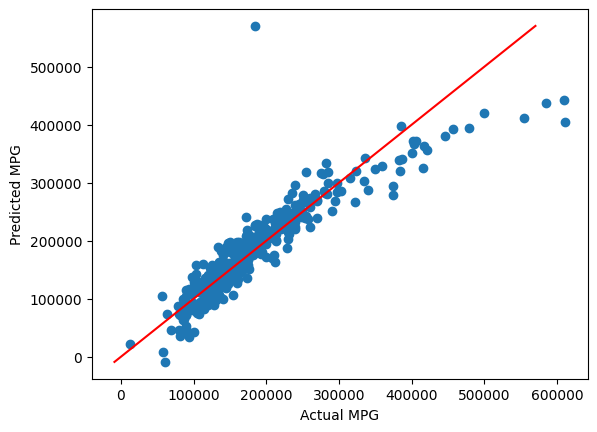

In [ ]:
#Train / fit the model -- SkiKitLearn: See how well our model performs on our test data
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
#Plot the predicted vs actual observations
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG') ;
#Red line: everything under is underpredicted and everything above is over predicted

In [ ]:
list(zip(y_test,y_pred))[:10] #these are the numerical values of the points in the above plot

[(324000, 319729.9967849769),
 (99500, 92669.27114298893),
 (173000, 195596.47409808054),
 (80900, 71264.54150923551),
 (174000, 218388.23553226842),
 (500000, 420906.8828320403),
 (159000, 146573.95365450415),
 (147000, 124634.01769102458),
 (86000, 69073.04939630954),
 (226750, 248969.42093687295)]

In [ ]:
 rmspe = (np. sqrt(np. mean(np. square((y_test - y_pred) / y_test)))) * 100
 rmspe

20.702771006920067

##Residual Analysis

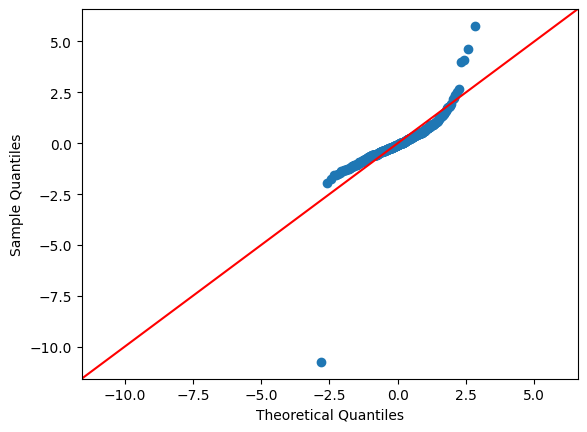

In [ ]:
# QQ Plot - RESIDUALS are normally distributed: GOOD FIT!
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

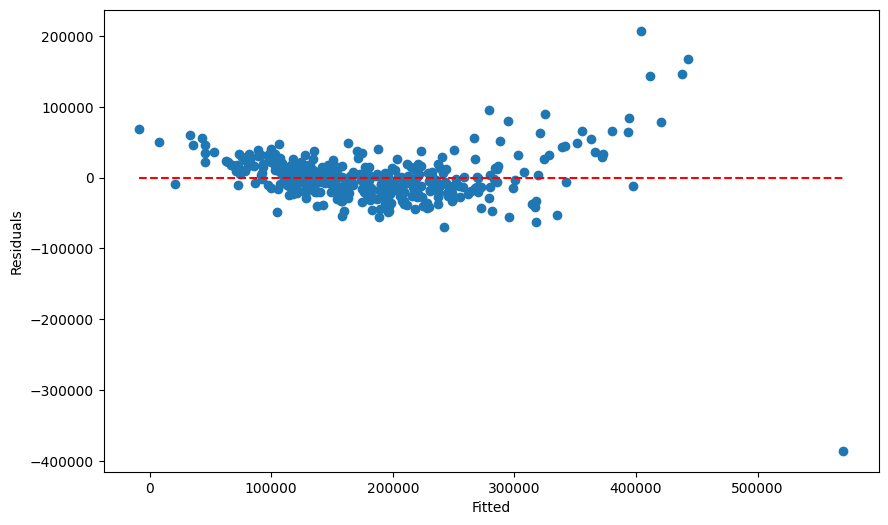

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance is what we want, an even distribution across and around the line, not the hose spray in the wind that we have here.
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

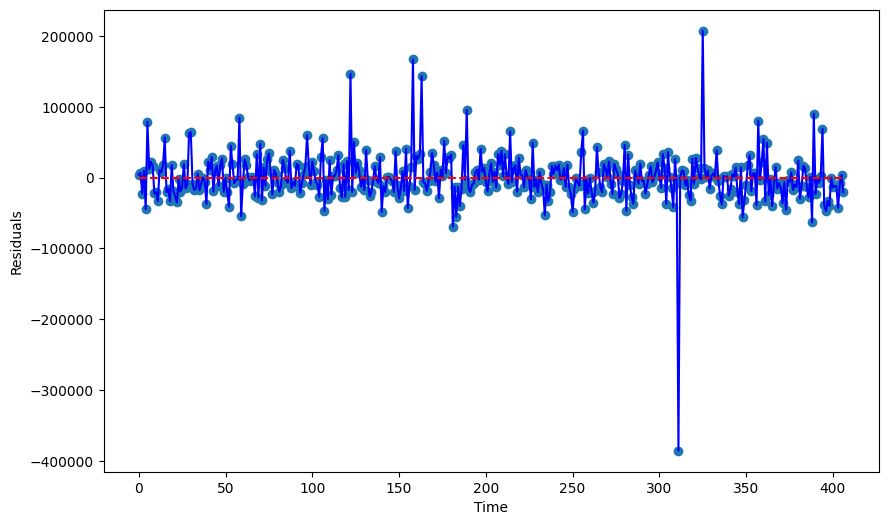

In [ ]:
# Residuals vs Time is our measure of indepedence: We want to see amplitude in the waves to represent a lot of noise evenly distributed, for goodness of fit.  This data is not ideal, and many not be the best fit for a standard linear regression model without scaling and regularization, and perhaps given the non-linearity in so many of the feature variables, regression may not be the best model at all.
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

# Future Directions

## Scaling and Regularization
### Lasso, Ridge, Robust